In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.path.append('../0_herramientas/')
%matplotlib inline

In [4]:
# vamos a descomponer la siguiente matriz en las matrices U, D y V, de las cuales solo D es diagonal y va a tener los valores singulares
matriz = np.array([[3, 7], [5, 2]])
U, D, V = np.linalg.svd(matriz)

In [5]:
# D solo devuelve los valores de la diagonal (solo una lista), si queremos verla como matriz tenemos que escribirla con np.diag(D)
np.diag(D)

array([[8.71337969, 0.        ],
       [0.        , 3.32821489]])

In [6]:
# comprobemos que de descomposicion da la original
print(matriz)
print(U.dot(np.diag(D).dot(V)))

[[3 7]
 [5 2]]
[[3. 7.]
 [5. 2.]]


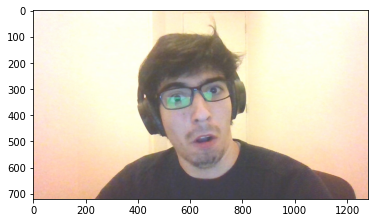

In [7]:
# aplicando svd a una imagen
import PIL
imagen = PIL.Image.open("probando.jpg")
plt.imshow(imagen)

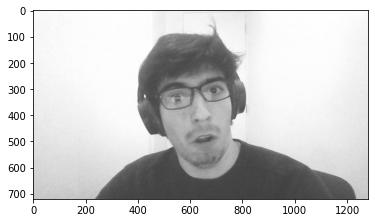

In [8]:
imagen_gris = imagen.convert('LA')
plt.imshow(imagen_gris)

In [9]:
imagen_gris_matriz = np.array(list(imagen_gris.getdata(band=0)), float) # convierto la imagen a una matriz
imagen_gris_matriz.shape = (imagen_gris.size[1], imagen_gris.size[0]) # le doy el tamaño correcto
U, D, V = np.linalg.svd(imagen_gris_matriz) # le aplico la descomposición SVD
print(U.shape)
print(D.shape)
print(V.shape)

(720, 720)
(720,)
(1280, 1280)


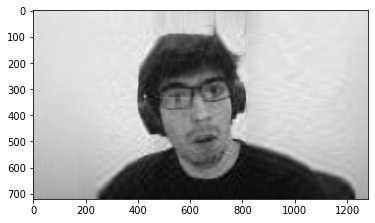

In [10]:
# aqui viene lo importante, podemos ir tomando algunas filas y columnas e ir reconstruyendo poco a poco la imagen
numero_pasos = 25 #numero de filas que tomamos
reconstruccion_paso_a_paso = np.matrix(U[:, :numero_pasos].dot(np.diag(D[:numero_pasos])).dot(np.matrix(V[:numero_pasos, :])))
plt.imshow(reconstruccion_paso_a_paso, cmap = 'gray')

In [11]:
print(D)

[1.97262979e+05 2.10925922e+04 1.97731607e+04 1.28536082e+04
 1.06004731e+04 7.54824552e+03 5.71919470e+03 5.10530013e+03
 4.22396326e+03 3.66663197e+03 3.23944064e+03 3.12725079e+03
 2.59434168e+03 2.50864839e+03 2.38880910e+03 2.22313560e+03
 2.09731478e+03 1.92196147e+03 1.80740305e+03 1.68569231e+03
 1.54597412e+03 1.51309613e+03 1.48327323e+03 1.41415787e+03
 1.32035652e+03 1.25731023e+03 1.19696852e+03 1.15639975e+03
 1.09982990e+03 1.02931107e+03 1.01534319e+03 9.91527319e+02
 9.42632917e+02 8.95492338e+02 8.89768448e+02 8.58646342e+02
 7.99498758e+02 7.85939450e+02 7.66272322e+02 7.35593767e+02
 7.16163803e+02 7.10591413e+02 6.59983229e+02 6.56351541e+02
 6.25033626e+02 6.24740081e+02 6.05798695e+02 5.95594402e+02
 5.81534181e+02 5.64207441e+02 5.58413080e+02 5.55242345e+02
 5.27318441e+02 5.22883367e+02 5.17942398e+02 5.02958415e+02
 4.93128878e+02 4.84433974e+02 4.73386980e+02 4.63917585e+02
 4.53809717e+02 4.51002115e+02 4.42712230e+02 4.33498958e+02
 4.30363804e+02 4.263424